# Krikey Data Science Case Study

## Data Cleansing with Pandas

After going through tables.txt to find out what each column refers to, I use Pandas to convert each CSV into dataframes so I can perform data cleaning. Since each "Unnamed: 0" column mirrors the index, I drop the columns on the grounds of redundancy.

In [1]:
import pandas as pd # use pandas to work with CSVs as dataframes

users = pd.read_csv("./data/users.csv")
watched_video = pd.read_csv("./data/watchedVideo.csv")
feeds = pd.read_csv("./data/feeds.csv")
videos = pd.read_csv("./data/videos.csv")

I note that there are 1000 users from the dataframe's shape. I notice the categorical column "class", and learn that there are four types of users: viewers, gamers, super gamers, creators, and super creators.

In [2]:
users.drop(
    labels=['Unnamed: 0'], 
    axis=1, 
    inplace=True)
print("User Classes:", users["class"].unique()) # how many classes of users are there?
print("Total Users:", users.shape)
users.head()

User Classes: ['Creator' 'Viewer' 'Super Gamer' 'Super Creator' 'Gamer']
Total Users: (1000, 4)


,id,created_at,class,coordinates
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')"
1,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-04-09 19:55:07,Viewer,"('43.71032', '-1.05366')"
2,5ebd5e12-ba2a-4bf9-b7e4-92ad24711cd4,2021-04-08 21:48:45,Super Gamer,"('51.26', '-2.1875')"
3,30986592-0cbf-43bb-83ed-7501ab3bd373,2021-05-15 00:45:51,Creator,"('40.65538', '-74.38987')"
4,25b49125-34d1-4694-a4a9-8415bcc3567b,2021-07-05 04:08:53,Viewer,"('35.61452', '-88.81395')"


We have more information, the thousand users made 5000 videos. I also notice that there are a lot of foreign keys we can't access in this table; the only one we can reference is "creator".

In [3]:
videos.drop(
    labels=["Unnamed: 0"],
    axis=1,
    inplace=True)
print("Total Videos:", videos.shape)
videos.head()

Total Videos: (5000, 10)


,id,attribute_id,music_id,animation_id,duration,creator,created_at,num_shares,game_id,is_ar
0,6e884071-8c0e-4782-aa40-e0fd78243360,4712e9e6-bef1-4646-b21e-ca5336901bf9,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,17dab81c-6180-4a4b-b539-91978a726cfd,5.34,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-08-04 10:42:39,12,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,True
1,ac90ff16-24b4-46bc-ae72-2da847f9e6c9,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,6d7a0545-0bca-4bf4-a306-931e57d8ffe2,3.88,0230f9af-e89f-4886-8322-52a38eaf991c,2021-11-27 10:06:43,3,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
2,fb5eaf0d-e72c-4523-b5c5-4d9c323cef5f,80f5b187-f6e6-40f2-9b6e-fe62b67049a8,d53234f4-1efb-4299-97c1-11658118cba5,716c02df-bd3a-41c9-b2be-86fb74ff3255,5.15,fbf93fbf-a935-436f-8516-8acb863e779f,2021-02-26 04:18:53,4,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
3,bbf89dcb-7fbd-439d-9a7d-36ef7a1c2aa3,02b2b662-1b39-4d91-9417-dddc9451d8e1,19e4db13-d854-4913-a8ca-3612ee1a6071,b7bd5204-2976-4eb0-ab71-508a848bc325,6.50,f7a2adb8-44d7-4408-a2a9-3a593fc6d626,2021-11-27 02:08:02,9,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,False
4,4c613ec6-fa6f-47e8-b4ab-658e2f6a644d,06c496ee-e884-42f9-ba39-010a66ed5296,b5b679a5-e769-4d95-82a6-f75e439b1ef9,17dab81c-6180-4a4b-b539-91978a726cfd,4.38,d9f9538f-1b7e-4f35-805d-924b309d75d8,2021-11-17 11:06:32,14,2609b6b5-3a08-451e-bce5-75fe506559d2,False


This is a bridge table linking users and videos as a many to many relationship. We complete the puzzle by noticing that each user (on average) watched 50 videos on this web service. I notice that there are three foreign keys pointing to videos, users, and feeds.

In [4]:
watched_video.drop(
    labels=["Unnamed: 0"],
    axis=1,
    inplace=True)

print("Total Videos Watched:", watched_video.shape) # (1000 users / 50000 videos watched == 1 user / 50 videos watched)
watched_video.head()

Total Videos Watched: (50000, 8)


,coordinates,os,duration,videoId,userId,appVersion,dateTime,feedId
0,"(Decimal('14.439490'), Decimal('105.291233'))",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,30134b9e-1b79-43fb-b0c5-373af9237b2c
1,"(Decimal('40.866935'), Decimal('-73.845013'))",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,8078efe7-5bae-4528-9a66-b85904cc73ac
2,"(Decimal('48.666850'), Decimal('9.359456'))",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1
3,"(Decimal('5.172365'), Decimal('-74.439009'))",Android,2.81,8ffc47e3-32ce-4d24-a990-9baac556603b,960fb90e-eddc-478a-a64a-04b9dded3a05,2.1.2,2021-12-04 21:02:50,42568c8a-efbe-4293-81a3-513e33094ade
4,"(Decimal('4.063707'), Decimal('9.606159'))",iOS,5.88,47e70477-7511-4bd0-801b-1651f951002f,1ce0c003-25e7-473f-8796-0fe04d6c275c,2.1.2,2021-11-28 16:12:39,582520b2-b30a-4ecb-b1b4-1806672fcfc4


At first, I thought "feeds" referred to each user's recommendations generated per session. After checking that all current feeds are unique, I felt like "feeds" is more similar to "genre" or another categorical. Therefore, I deduced that this table's contents don't change as often, verifying the low row count.

In [5]:
feeds.drop(
    labels=["Unnamed: 0"],
    axis=1,
    inplace=True)
print("Categorical: ", all(item in list(feeds["name"]) for item in set(feeds["name"]))) # are all items unique?
print("Total Feeds:", feeds.shape)
feeds

Categorical:  True
Total Feeds: (10, 2)


,id,name
0,27a87df4-da75-451f-b8f6-af9dd0a4ee00,music
1,42568c8a-efbe-4293-81a3-513e33094ade,fashion
2,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,sports
3,c9d59470-c4ee-43ff-831d-b52508c8d848,games
4,582520b2-b30a-4ecb-b1b4-1806672fcfc4,travel
5,a8a04865-55d4-4de4-8141-b273b678299f,fun
6,644a3cb6-e266-4757-9e96-a3ee049216fe,jokes
7,da6c201f-8e50-433c-b2ad-614e42fac047,love
8,8078efe7-5bae-4528-9a66-b85904cc73ac,dance
9,30134b9e-1b79-43fb-b0c5-373af9237b2c,beaches


I dislike working with coordinate data when contained as a string, so I perform feature engineering to encode the coordinates column into two new latitude and longitude columns.

In [6]:
import re

def encode(dfs): # to encode coords -> lat, lon
    for df in dfs:
        coords = []
        for s in df["coordinates"]:
            coords.append(re.findall("\d*\.?\d+", s)) # regex to find decimal numbers
        df["latitude"], df["longitude"] = zip(*coords)
        df.drop( # drops original after
            labels=["coordinates"],
            axis=1,
            inplace=True)

encode([users, watched_video])
users.head()

,id,created_at,class,latitude,longitude
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924
1,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-04-09 19:55:07,Viewer,43.71032,1.05366
2,5ebd5e12-ba2a-4bf9-b7e4-92ad24711cd4,2021-04-08 21:48:45,Super Gamer,51.26,2.1875
3,30986592-0cbf-43bb-83ed-7501ab3bd373,2021-05-15 00:45:51,Creator,40.65538,74.38987
4,25b49125-34d1-4694-a4a9-8415bcc3567b,2021-07-05 04:08:53,Viewer,35.61452,88.81395


## Data Validation with SQL and PySpark

Although I dropped negligible rows and learned a bit more about the dataset, we haven't finished data cleansing yet. We still have to detect corrupt records to remove, which I can with Apache Spark. Even though we can do the same with Pandas, I can also demonstrate both big data analytics skills with PySpark and my fluency with SQL in this manner.

In [7]:
from pyspark.sql import SparkSession
sp = SparkSession.builder.appName('krikey_challenge').getOrCreate()

users_sp = sp.createDataFrame(users)
videos_sp = sp.createDataFrame(videos)
watched_video_sp = sp.createDataFrame(watched_video)
feeds_sp = sp.createDataFrame(feeds)

videos_sp.printSchema() # auto infers schema

22/04/24 14:17:19 WARN Utils: Your hostname, Karthiks-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.67 instead (on interface en0)
22/04/24 14:17:19 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/04/24 14:17:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- id: string (nullable = true)
 |-- attribute_id: string (nullable = true)
 |-- music_id: string (nullable = true)
 |-- animation_id: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- creator: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- num_shares: long (nullable = true)
 |-- game_id: string (nullable = true)
 |-- is_ar: boolean (nullable = true)



 Therefore, I convert our dataframes from Pandas to Spark. To be able to query with raw SQL, we create temporary views with each PySpark dataframe.

In [8]:
users_sp.createOrReplaceTempView("users")
videos_sp.createOrReplaceTempView("videos")
watched_video_sp.createOrReplaceTempView("watched_video")
feeds_sp.createOrReplaceTempView("feeds")

We must remove any video that was created before its creator because otherwise, there would be no creator to create the video in the first place. There are none to remove, however.

In [9]:
sp.sql('''
    select v.id
    from videos as v
    inner join users as u
        on v.creator = u.id
    where u.created_at > v.created_at;
''').toPandas().count()

id    0
dtype: int64

In the same way, a video cannot be watched before both its creator's and its own "created_at". Lucky for us, there aren't any, too.

In [10]:
sp.sql('''
    select f.name
    from watched_video as wv
    inner join users as u
        on u.id = wv.userId
    inner join videos as v
        on v.id = wv.videoId
    inner join feeds as f
        on f.id = wv.feedId
    where u.created_at > wv.dateTime
        or v.created_at > wv.dateTime;
''').toPandas().count()

name    0
dtype: int64

The video's duration must be strictly greater than 0 because a video can't be negative nor zero. Its number of shares, however, can be zero, but can't be negative. We must remove the impossibilities, but there are none.

In [11]:
sp.sql('''
    select v.id
    from videos as v
    where v.duration <= 0
        or v.num_shares < 0;
''').toPandas().count()

id    0
dtype: int64

We try filtering any dates (in every table) that don't make sense.

In [12]:
from pyspark.sql.functions import col
from pyspark.sql.types import DateType

# string -> datetime
users_sp = users_sp.withColumn('created_at', col('created_at').cast(DateType()))
videos_sp = videos_sp.withColumn('created_at', col('created_at').cast(DateType()))
watched_video_sp = watched_video_sp.withColumn('dateTime', col('dateTime').cast(DateType()))


None of the dates seem abnormal, so we can carry on. Although we can get rid of null values as a final step to data cleansing, I like to keep them until I absolutely have to get rid of them, such as data wrangling. With the validated dataframes ready for accurate visualization, we can stop our Spark session.

In [13]:
sp.sql('''
    select min(created_at), max(created_at) from users;
''').show()

sp.sql('''
    select min(created_at), max(created_at) from videos;
''').show()

sp.sql('''
    select min(dateTime), max(dateTime) from watched_video;
''').show()

+-------------------+-------------------+
|    min(created_at)|    max(created_at)|
+-------------------+-------------------+
|2021-01-01 02:31:57|2021-12-15 06:52:35|
+-------------------+-------------------+

+-------------------+-------------------+
|    min(created_at)|    max(created_at)|
+-------------------+-------------------+
|2021-01-11 12:50:38|2021-12-15 11:09:05|
+-------------------+-------------------+

+-------------------+-------------------+
|      min(dateTime)|      max(dateTime)|
+-------------------+-------------------+
|2021-01-20 15:38:52|2021-12-15 11:20:06|
+-------------------+-------------------+



## Data Mining with SQL and Visualization

### Who Uses Our App and Where Do They Watch From?
This service seems to have breached every region except Australia and the Americas, and has the majority of its user base in the Asian market. The distribution of each class seems to be normal, as seen with the colors categorizing them. Viewers are green, gamers are blue, super gamers are purple, creators are orange, super creators are red. If you hover over each user, you can access their "created_at" time. If you don't want to take the time to load the map from code, access the map you want to view from ./maps/*.html.

In [14]:
import folium as fm
from folium.plugins import MarkerCluster
users_map = fm.Map(location=[21.420847,39.826869], zoom_start=3)
users_cluster = MarkerCluster().add_to(users_map)
users.apply(
    lambda row:
        fm.Marker(
            location=[row["latitude"], row["longitude"]], 
            popup=row["created_at"], 
            icon=fm.Icon(color="green")
        ).add_to(users_cluster) if row["class"] == "Viewer" else (
            fm.Marker(
                location=[row["latitude"], row["longitude"]], 
                popup=row["created_at"], 
                icon=fm.Icon(color="blue")
            ).add_to(users_cluster) if row["class"] == "Gamer" else (
                fm.Marker(
                    location=[row["latitude"], row["longitude"]], 
                    popup=row["created_at"], 
                    icon=fm.Icon(color="orange")
                ).add_to(users_cluster) if row["class"] == "Creator" else (
                    fm.Marker(
                        location=[row["latitude"], row["longitude"]], 
                        popup=row["created_at"], 
                        icon=fm.Icon(color="purple")
                    ).add_to(users_cluster) if row["class"] == "Super Gamer" else (
                        fm.Marker(
                            location=[row["latitude"], row["longitude"]], 
                            popup=row["created_at"], 
                            icon=fm.Icon(color="red")
                        ).add_to(users_cluster))))), axis=1)
# users_map.save("users_map.html")
users_map

0      <folium.map.Marker object at 0x7fa9bbf0cbb0>
1      <folium.map.Marker object at 0x7fa9bbf0ca30>
2      <folium.map.Marker object at 0x7fa9bbf0c310>
3      <folium.map.Marker object at 0x7fa9bbf0c0d0>
4      <folium.map.Marker object at 0x7fa9bbf0c2e0>
                           ...                     
995    <folium.map.Marker object at 0x7fa9bc4208b0>
996    <folium.map.Marker object at 0x7fa9bc420a00>
997    <folium.map.Marker object at 0x7fa9bc420b50>
998    <folium.map.Marker object at 0x7fa9bc420ca0>
999    <folium.map.Marker object at 0x7fa9bc420df0>
Length: 1000, dtype: object

The distribution of users within each class seems to only vary by less than 50. There are more super creators than there are creators, but there seems to be about the same gamers as super gamers. There are as many viewers as there are creators.

In [15]:
from collections import Counter
Counter(users["class"])

Counter({'Creator': 186,
         'Viewer': 186,
         'Super Gamer': 209,
         'Super Creator': 206,
         'Gamer': 213})

The European market seems to have the highest traffic with about ~11,000 videos watched. Then, the Middle East and mid-Asia follow with ~9300 and ~8000 videos. India and China both have around 6000 videos watched, while southeast Asia has 4,000. The lowest performing markets are the African and Russian.

In [16]:
watched_video_map = fm.Map(location=[21.420847,39.826869], zoom_start=3)
wv_cluster = MarkerCluster().add_to(watched_video_map)
watched_video.apply(
    lambda row:
        fm.Marker(
            location=[row["latitude"], row["longitude"]],
            icon=fm.Icon(color="green")
        ).add_to(wv_cluster) if row["os"] == "Android" else (
            fm.Marker(
                location=[row["latitude"], row["longitude"]], 
                icon=fm.Icon(color="blue")
            ).add_to(wv_cluster) if row["os"] == "iOS" else (
                fm.Marker(
                    location=[row["latitude"], row["longitude"]], 
                    icon=fm.Icon(color="red")
                ).add_to(wv_cluster))), axis=1)
# watched_video_map.save("watched_video_map.html")
watched_video_map

0        <folium.map.Marker object at 0x7fa9bc5246a0>
1        <folium.map.Marker object at 0x7fa9bc524d00>
2        <folium.map.Marker object at 0x7fa9bc524670>
3        <folium.map.Marker object at 0x7fa9bc524880>
4        <folium.map.Marker object at 0x7fa9bc524910>
                             ...                     
49995    <folium.map.Marker object at 0x7fa9a4948040>
49996    <folium.map.Marker object at 0x7fa9a49480d0>
49997    <folium.map.Marker object at 0x7fa9a4948130>
49998    <folium.map.Marker object at 0x7fa9a4948190>
49999    <folium.map.Marker object at 0x7fa9a49481f0>
Length: 50000, dtype: object

### Does the App Have Bugs Affecting User Satisfaction?
We can check how compatible the app is to its platform by comparing how long the user spends watching a video with respect to both his OS and appVersion. Because there aren't differences in how the violins look, we can tell users don't have problems consuming content no matter which OS or version they have. In fact, the app is gaining more traction and success after each release since each half of the violin is getting wider towards the top.

<AxesSubplot:xlabel='appVersion', ylabel='duration'>

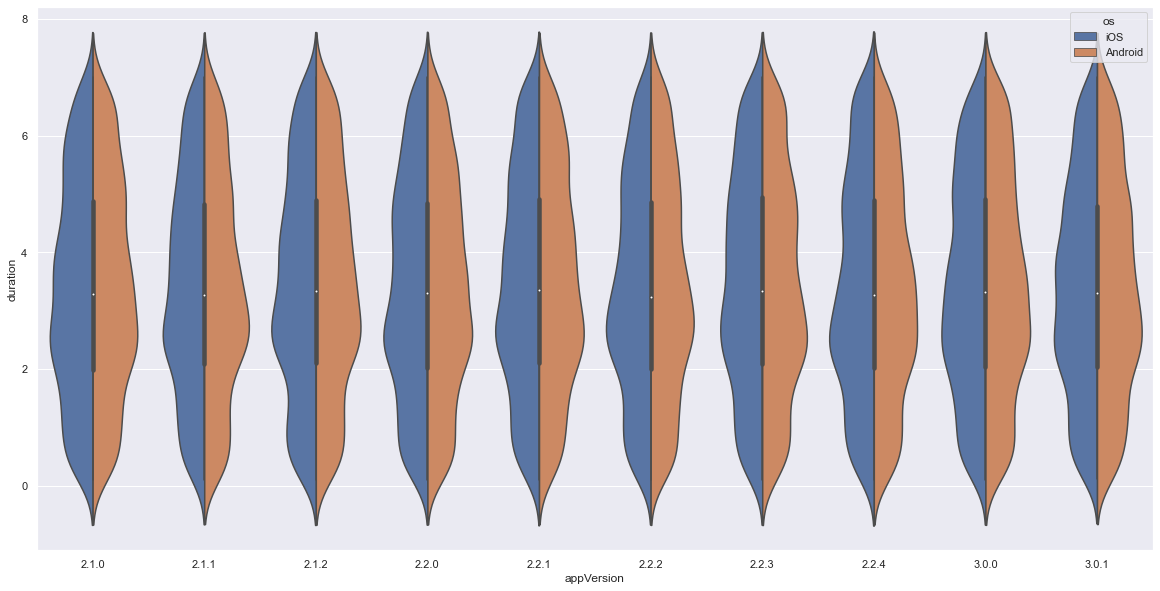

In [50]:
import seaborn as sns
%matplotlib inline
sns.set(rc = {'figure.figsize':(20,10)})
sns.violinplot(
    data=watched_video, 
    x="appVersion", 
    y="duration", 
    hue="os", 
    split=True,
    order=sorted(set(watched_video["appVersion"])))

### Which Feed is the Most Popular?
The top 3 most popular feeds are fashion, travel, and fun, raking in on average 17,300 minutes.

In [18]:
sp.sql('''
    select f.name, sum(wv.duration) as total_duration
    from watched_video as wv
    inner join feeds as f
        on f.id = wv.feedId
    group by f.name
    order by total_duration desc
''').show(10)

+-------+------------------+
|   name|    total_duration|
+-------+------------------+
|fashion|17573.160000000003|
| travel|17310.290000000008|
|    fun| 17225.10999999999|
|  music| 17083.13000000006|
|  games|17046.309999999976|
|  dance| 16989.67000000001|
|   love|16923.410000000018|
|  jokes|16866.379999999994|
| sports|16815.889999999985|
|beaches|16678.140000000007|
+-------+------------------+



The top 3 feeds with the longest videos are fun, fashion, and music which go on for 3.44 minutes, and the top 3 shortest feeds are sports, jokes, and dance which last 3.30 minutes. The range between the shortest and longest average videos aren't substantial, though.

In [19]:
sp.sql('''
    select f.name, avg(wv.duration) as avg_duration
    from watched_video as wv
    inner join feeds as f
        on f.id = wv.feedId
    group by f.name
    order by avg_duration desc
''').show(10)

+-------+------------------+
|   name|      avg_duration|
+-------+------------------+
|    fun|3.4630297547245656|
|fashion| 3.434941360437843|
|  music| 3.431725592607485|
|   love| 3.426485118445033|
|  games| 3.416778913609937|
|beaches|3.4071787538304408|
| travel|3.3915144984326036|
|  dance|3.3897984836392676|
|  jokes|  3.38954581993569|
| sports|3.3517819413992394|
+-------+------------------+



### What Makes a User Successful?
A user's success can be measured through how long their videos are and how many times their video was shared. Creators have, on average, the longest videos at 4.61 minutes; gamers, viewers, and super creators hover near 4.53 minutes while the shortest videos, on average, are made by super gamers at 4.46 minutes.

In [20]:
sp.sql('''
    select u.class, avg(v.duration) as avg_vid_length
    from videos as v
    inner join users as u
        on u.id = v.creator
    group by u.class
    order by avg_vid_length desc;
''').show()

+-------------+-----------------+
|        class|   avg_vid_length|
+-------------+-----------------+
|      Creator|4.616448598130845|
|        Gamer|4.555055658627078|
|       Viewer|4.532316017316011|
|Super Creator| 4.52020689655173|
|  Super Gamer|4.461450980392156|
+-------------+-----------------+



Creators have the most shares at 10.08 on average. gamers and super gamers both receive 9.82-5, respectively. Super gamers and viewers come in last around 9.77-1, respectively. However, it may be the case that the shorter videos get shared more than longer ones or vice versa.

In [21]:
sp.sql('''
    select u.class, avg(v.num_shares) as avg_num_shares
    from videos as v
    inner join users as u
        on u.id = v.creator
    group by u.class
    order by avg_num_shares desc;
''').show()

+-------------+------------------+
|        class|    avg_num_shares|
+-------------+------------------+
|      Creator|10.080996884735203|
|Super Creator| 9.851231527093596|
|        Gamer| 9.826530612244898|
|  Super Gamer| 9.770588235294118|
|       Viewer| 9.716450216450216|
+-------------+------------------+



We analyze whether the number of shares of a video increases as its length increases. We don't see a strong enough correlation, so we try to see which class of user gets more shares according to the length of their videos. There isn't a strong enough correlation. 

<AxesSubplot:xlabel='num_shares', ylabel='vid_length'>

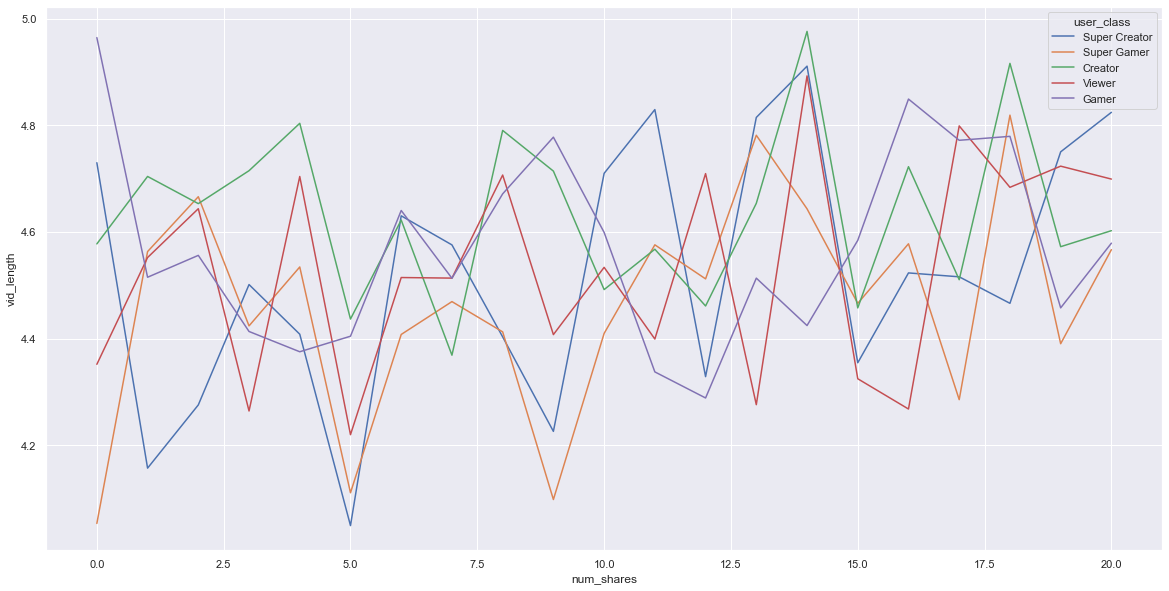

In [44]:
sns.lineplot(
    data=sp.sql('''
        select 
            f.name as feed_group,
            v.duration as vid_length, 
            u.class as user_class, 
            v.created_at, 
            v.num_shares, 
            v.is_ar
        from videos as v
        inner join users as u
            on v.creator = u.id
        inner join watched_video as wv
            on v.id = wv.videoId
        inner join feeds as f
            on f.id = wv.feedId
    ''').toPandas(), 
    x="num_shares", 
    y="vid_length", 
    hue="user_class",
    ci=None)

### Do Videos Benefit from Being AR?
The videos don't benefit from being AR since they behave similarly when compared against how many times on average each gets shared.

<AxesSubplot:xlabel='is_ar', ylabel='num_shares'>

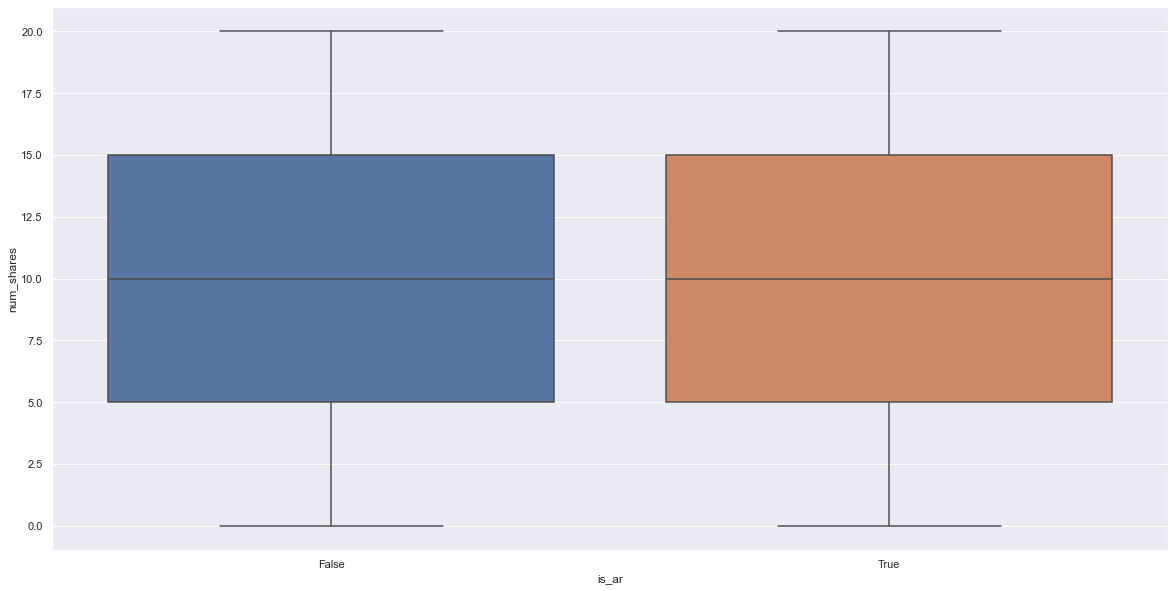

In [49]:
sns.boxplot(
    data=sp.sql('''
        select 
            f.name as feed_group,
            v.duration as vid_length, 
            u.class as user_class, 
            v.created_at, 
            v.num_shares, 
            v.is_ar
        from videos as v
        inner join users as u
            on v.creator = u.id
        inner join watched_video as wv
            on v.id = wv.videoId
        inner join feeds as f
            on f.id = wv.feedId
    ''').toPandas(), 
    x="is_ar", 
    y="num_shares")